In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

# 멤리스터

In [370]:
class Memristor:
    def __init__(self, name):
        self.name = name
        self.x = 0.1
        self.xp = 0.1
        self.xn = 0.2
        self.vp = 1.5
        self.vn = 0.7
        self.alphap = 6
        self.alphan = 4
        self.a1 = 4e-4
        self.a2 = 3e-4
        self.ap = 0.032
        self.an = 0.001
        self.b = 1.0
        
        self.gf = 0.0
        
        self.interval = 0.1
    
    def change_x(self, V):
        if V >= 0:
            if self.x >= self.xp:
                self.f = exp(-self.alphap*(self.x - self.xp)) * (((self.xp - self.x)/(1 - self.xp)) + 1)
            else:
                self.f = 1.0
        elif V < 0:
            if self.x <= (1 - self.xn):
                self.f = exp(self.alphan*(self.x + self.xn - 1.0)) * (self.x/(1-self.xn))
            else:
                self.f = 1.0
            
        if V > self.vp:
            self.g = self.ap * (exp(V)-exp(self.vp))
        elif V < -self.vn:
            self.g = -self.an * (exp(-V)-exp(self.vn))
        else:
            self.g = 0
            
        self.gf = self.f * self.g
        self.x += self.gf * self.interval
    
    def activate(self, V):
        self.change_x(V)
        
        if V >= 0:
            curr = self.a1 * self.x * sinh(self.b * V)
        else:
            curr = self.a2 * self.x * sinh(self.b * V)
        
        return curr

In [371]:
mem_1 = Memristor('mem_1')

In [372]:
base_time = np.arange(0, 20*pi, mem_1.interval)

In [373]:
input_volt = []
for t in base_time:
    input_volt.append(5 * sin(t/10))

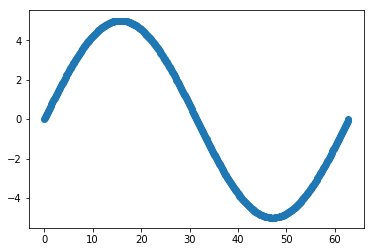

In [374]:
plt.scatter(base_time, input_volt)

In [375]:
output = []
for V in input_volt:
    curr = mem_1.activate(V)
    output.append(curr)

In [376]:
output = np.array(output)
output = output * 1e+6

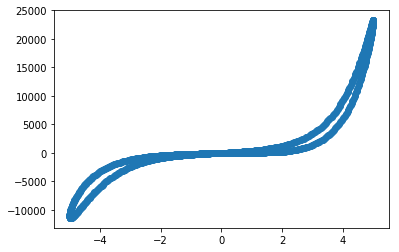

In [377]:
plt.scatter(input_volt, output)

In [367]:
mem_2 = Memristor("mem_2")

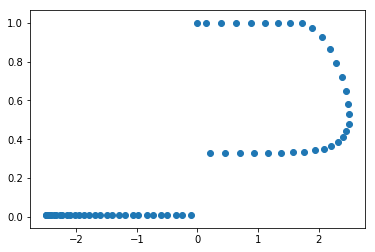

In [368]:
output_2 = []
for V in input_volt:
    mem_2.activate(V)
    output_2.append(mem_2.f)
    
output_2 = np.array(output_2)
plt.scatter(input_volt, output_2)

In [369]:
output_2[:10]

array([1.        , 0.00760126, 0.00760126, 0.00760126, 0.00760125,
       0.0076012 , 0.00760109, 0.00760093, 0.00760068, 0.00760036])